In [100]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from datetime import datetime
import itertools
%matplotlib inline
sns.set()

In [11]:
data_sample = pd.read_csv('../seta.csv',dtype={"value": float})
data_sample2 = pd.read_csv('../setb.csv',dtype={"value": float})
data_sample3 = pd.read_csv('../setc.csv',dtype={"value": float})
data_sample4 = pd.read_csv('../setd.csv',dtype={"value": float})

data_sample = data_sample.append([data_sample2,data_sample3,data_sample4])
data_sample['startDate'] = pd.to_datetime(data_sample['startDate']) 
data_sample['owner'].replace('00000000-5854-8d6f-b8eb-cf14a0f795df','00000000-56ff-538b-2223-e1800b5e3ddb',inplace=True)
data_sample['startDate'] = pd.to_datetime(data_sample['startDate'])
data_sample['endDate'] = pd.to_datetime(data_sample['endDate'])


to_tdelta = lambda row: row['endDate'] - row['startDate']
data_sample['duration'] = data_sample.apply(to_tdelta, axis=1)
data_sample['day_of_week'] = data_sample['startDate'].dt.dayofweek
data_sample.head() #0 - 6 is monday - sunday 
data_sample['owner'].unique()

array(['00000000-56ff-538b-2223-e1800b5e3ddb',
       '00000000-5851-ee08-eb34-e20acc5af74e',
       'd145b032-b7a5-4fa8-9887-b46598f4683a',
       '00000000-5951-4787-2497-ae32dc8d07d4',
       '00000000-584e-1f39-bdee-d4102b989d01',
       '00000000-584d-a4f0-bdee-d4102b989ce5'], dtype=object)

In [12]:
x1 = data_sample.type
x2 = data_sample.value

types = ['health-bmi','health-body-fat','health-weight', 'health-step-count']
type(x1)

pandas.core.series.Series

In [13]:
def prepare_table(x, y,time='D',data_sample=data_sample):
    steps = data_sample[data_sample['type'] == x]
    bodyfat = data_sample[data_sample['type'] == y]


    steps.index = steps['startDate']
    bodyfat.index = bodyfat['startDate']


    steps['value'] = pd.to_numeric(steps['value'])
    steps = steps.loc[:,'value']
    if x == 'health-step-count':
        steps = steps.resample(time).sum()
    else:
        steps = steps.resample(time).mean()


    bodyfat['value'] = pd.to_numeric(bodyfat['value'])
    bodyfat = bodyfat.loc[:,'value']
    bodyfat = bodyfat.resample(time).mean()

    steps = steps.to_frame('first')
    steps['second'] = bodyfat
    
    return steps

In [14]:
def plotter(steps):
    steps = steps.dropna()
    x = steps['first'].values
    y = steps['second'].values
    x = x.reshape(len(x), 1)
    y = y.reshape(len(x), 1)

    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    # plot it as in the example at http://scikit-learn.org/
    plt.scatter(x, y,  color='black')
    plt.plot(x, regr.predict(x), color='yellow', linewidth=2)
    
    corr_info = stats.stats.pearsonr(x, y)
    r = corr_info[0][0]
    p = corr_info[1][0]
    return r, p


In [15]:
users = data_sample['owner'].unique()
users

array(['00000000-56ff-538b-2223-e1800b5e3ddb',
       '00000000-5851-ee08-eb34-e20acc5af74e',
       'd145b032-b7a5-4fa8-9887-b46598f4683a',
       '00000000-5951-4787-2497-ae32dc8d07d4',
       '00000000-584e-1f39-bdee-d4102b989d01',
       '00000000-584d-a4f0-bdee-d4102b989ce5'], dtype=object)

/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


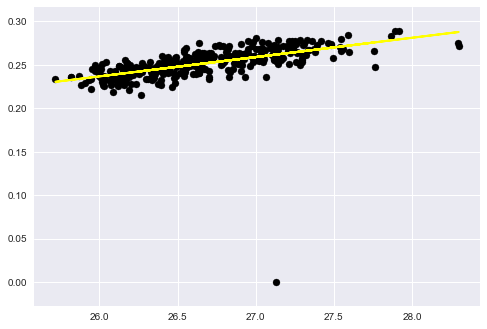

The r and p values for health-bmi and health-body-fat are: r = 0.527549491097 and p = 1.30612283293e-25


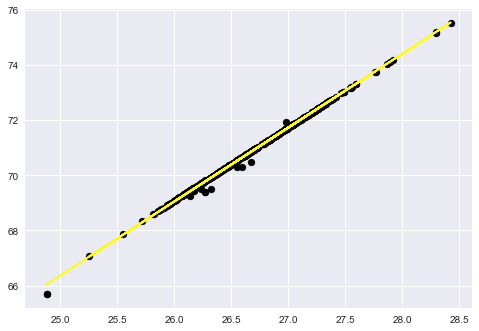

The r and p values for health-bmi and health-weight are: r = 0.999116619552 and p = 0.0


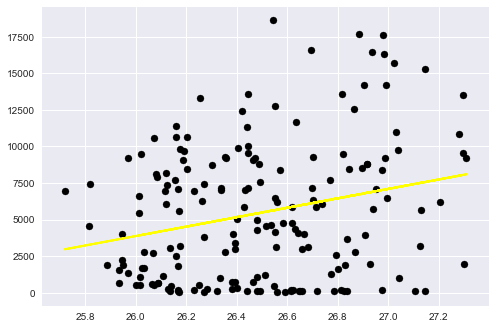

The r and p values for health-bmi and health-step-count are: r = 0.252607099141 and p = 0.000623631771417


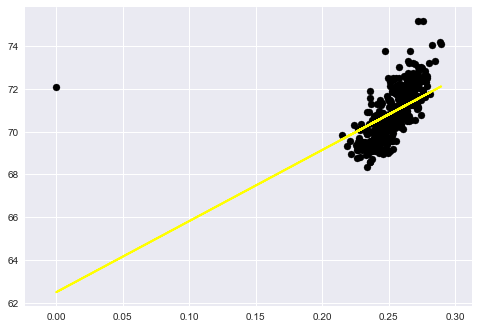

The r and p values for health-body-fat and health-weight are: r = 0.526508167397 and p = 1.68929989532e-25


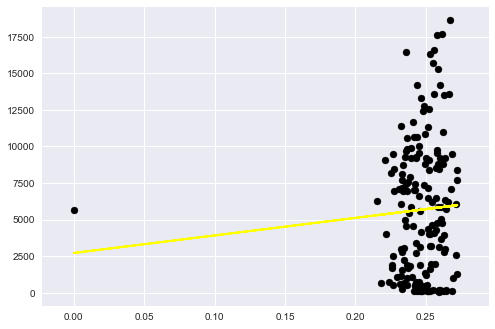

The r and p values for health-body-fat and health-step-count are: r = 0.0586972783097 and p = 0.444358470653


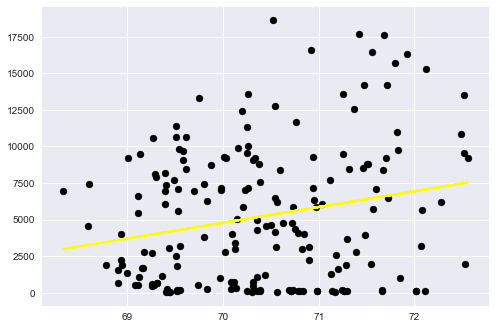

The r and p values for health-weight and health-step-count are: r = 0.223921702743 and p = 0.00195212853958


In [16]:

for i in itertools.combinations(types, 2):
    t1 = i[0]
    t2 = i[1]
    a, b = plotter(prepare_table(t1, t2, data_sample=data_sample[data_sample['owner']==users[0]]))
    plt.show()
    print("The r and p values for {} and {} are: r = {} and p = {}".format(t1, t2, a, b))


In [17]:
bmi = data_sample[data_sample['type'] == 'health-bmi']
bmi.index = bmi['startDate']
bmi['value'] = pd.Series(bmi['value']).convert_objects(convert_numeric=True)

/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


           value
count  39.000000
mean   26.617052
std     0.584003
min    24.880000
25%    26.185133
50%    26.663805
75%    27.046300
max    27.867441
           value
count  48.000000
mean   26.613121
std     0.475184
min    25.331826
25%    26.272970
50%    26.680381
75%    26.994899
max    27.469894
           value
count   1.000000
mean   21.481277
std          NaN
min    21.481277
25%    21.481277
50%    21.481277
75%    21.481277
max    21.481277


/Users/Luqmaan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=571.0, right=571.0
  'left=%s, right=%s') % (left, right))


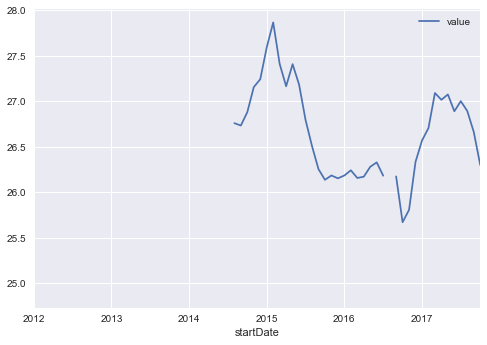

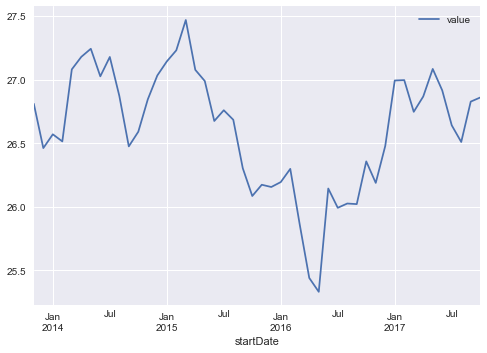

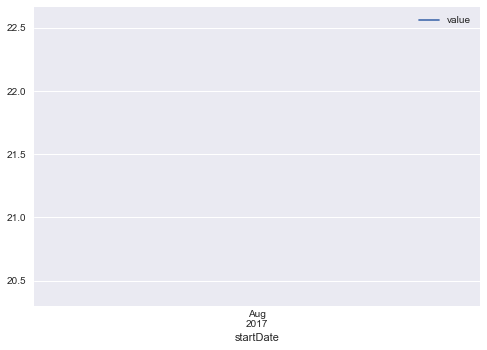

In [18]:
# BMI by month over the whole period
bmi_means = {}
for owner in bmi['owner'].unique():
    data_by_owner = bmi[bmi['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean()
    resampled_data.plot()
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']
    bmi_means[owner] = mean
    

In [19]:
for owner in bmi_means:
    print('Owner {} has monthly BMI mean of {}'.format(owner, bmi_means[owner]))

Owner 00000000-5951-4787-2497-ae32dc8d07d4 has monthly BMI mean of 21.4812765621
Owner 00000000-56ff-538b-2223-e1800b5e3ddb has monthly BMI mean of 26.6170523602
Owner 00000000-5851-ee08-eb34-e20acc5af74e has monthly BMI mean of 26.6131209286


           value
count  38.000000
mean    0.001571
std     0.015163
min    -0.019238
25%    -0.006506
50%     0.000864
75%     0.005267
max     0.075564
           value
count  47.000000
mean    0.000091
std     0.010275
min    -0.016711
25%    -0.007191
50%     0.001203
75%     0.004428
max     0.032079
       value
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN


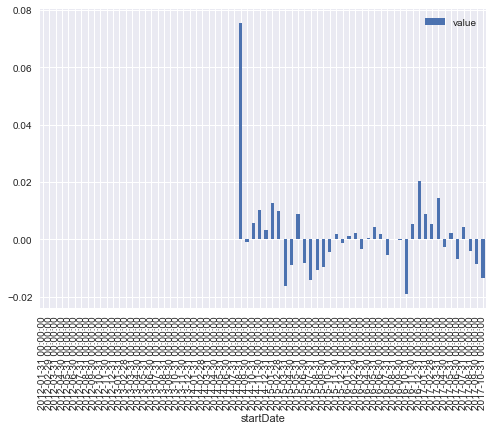

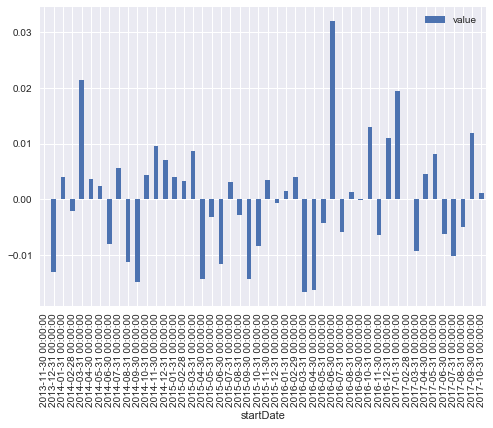

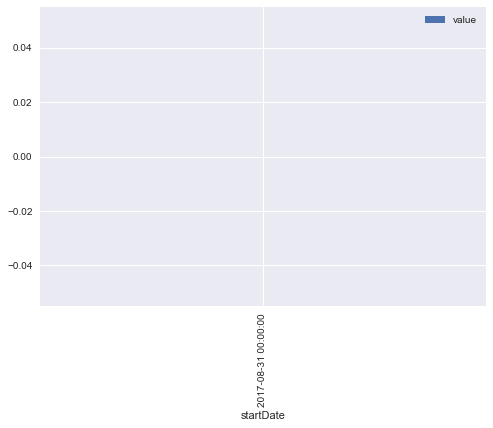

In [20]:
# pct_change slope comparison of each bmi
for owner in bmi['owner'].unique():
    data_by_owner = bmi[bmi['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean().pct_change()
    resampled_data.plot(kind='bar')
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']

In [21]:
weight = data_sample[data_sample['type'] == 'health-weight']
weight.index = weight['startDate']
weight['value'] = pd.Series(weight['value']).convert_objects(convert_numeric=True)

/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Luqmaan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


           value
count  39.000000
mean   70.698724
std     1.588081
min    65.700000
25%    69.577740
50%    70.830029
75%    71.859314
max    74.041000
           value
count  48.000000
mean   86.226737
std     1.539990
min    82.075113
25%    85.124421
50%    86.444431
75%    87.466679
max    89.002452
           value
count   5.000000
mean   59.692756
std     1.056491
min    58.740211
25%    58.967007
50%    59.193806
75%    60.327785
max    61.234970
            value
count    1.000000
mean   108.408488
std           NaN
min    108.408488
25%    108.408488
50%    108.408488
75%    108.408488
max    108.408488


/Users/Luqmaan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=573.0, right=573.0
  'left=%s, right=%s') % (left, right))


           value
count  12.000000
mean   71.574003
std     3.471932
min    66.700759
25%    68.837036
50%    70.465419
75%    74.959217
max    76.257950
           value
count   1.000000
mean   54.431084
std          NaN
min    54.431084
25%    54.431084
50%    54.431084
75%    54.431084
max    54.431084


/Users/Luqmaan/anaconda/lib/python2.7/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=551.0, right=551.0
  'left=%s, right=%s') % (left, right))


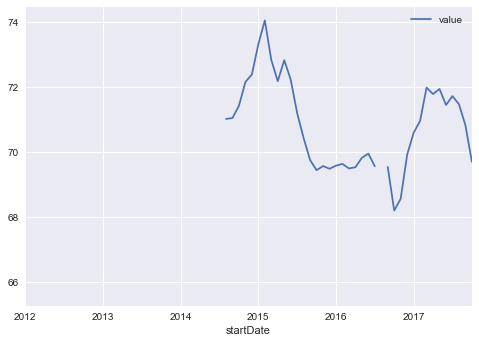

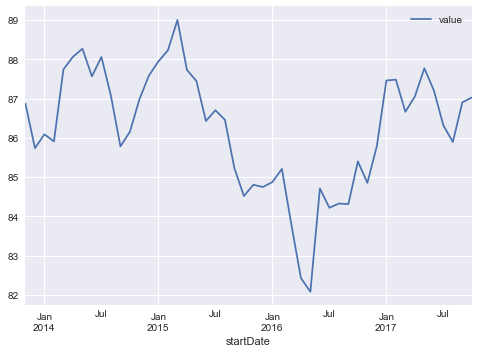

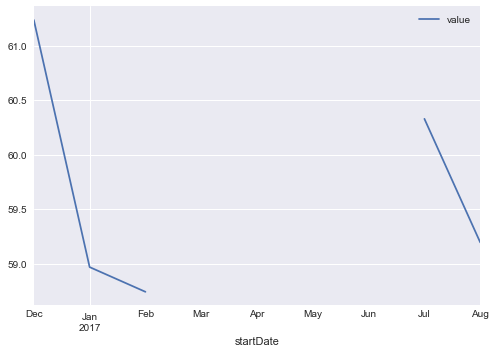

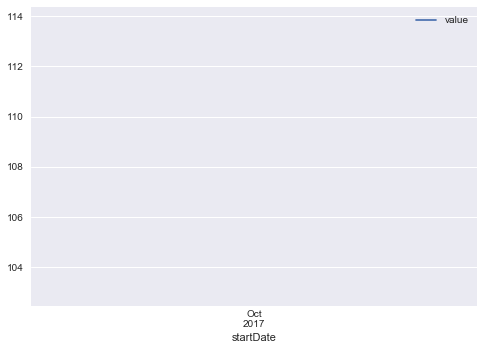

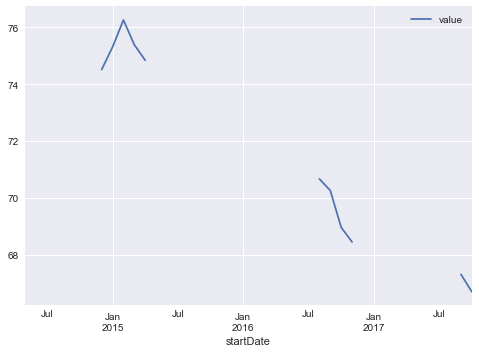

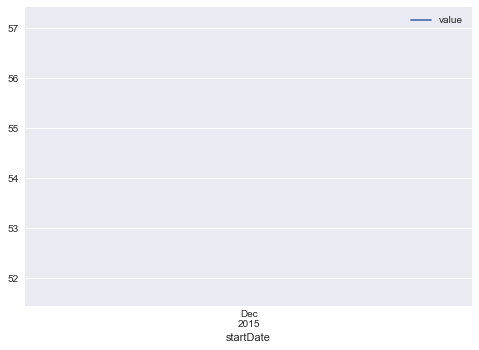

In [22]:
#weight over time
weight_info = {}
for owner in weight['owner'].unique():
    data_by_owner = weight[weight['owner'] == owner][['value']]
    resampled_data = data_by_owner.resample('M').mean()
    resampled_data.plot()
    print(resampled_data.describe())
    mean = resampled_data.describe().loc['mean', 'value']
    min_ = data_by_owner.describe().loc['min', 'value']
    max_ = data_by_owner.describe().loc['max', 'value']
    weight_info[owner] = {'mean': mean, 'min': min_, 'max': max_}

In [23]:
# weight with means, mins, and maxs
for owner in weight_info:
    print('Owner {} has monthly weight mean of {}, min of {}, max of {}'.format(owner, weight_info[owner]['mean'],  weight_info[owner]['min'],  weight_info[owner]['max']))

Owner d145b032-b7a5-4fa8-9887-b46598f4683a has monthly weight mean of 108.408488, min of 108.408488, max of 108.408488
Owner 00000000-5951-4787-2497-ae32dc8d07d4 has monthly weight mean of 59.6927558335, min of 58.7402114868, max of 61.2349700928
Owner 00000000-5851-ee08-eb34-e20acc5af74e has monthly weight mean of 86.2267369248, min of 80.364, max of 90.9640045166
Owner 00000000-584e-1f39-bdee-d4102b989d01 has monthly weight mean of 54.4310844, min of 54.4310844, max of 54.4310844
Owner 00000000-584d-a4f0-bdee-d4102b989ce5 has monthly weight mean of 71.5740032601, min of 65.997689835, max of 77.56429527
Owner 00000000-56ff-538b-2223-e1800b5e3ddb has monthly weight mean of 70.6987244118, min of 65.7, max of 77.2030029297


In [132]:
# biggest change in a month period
for owner in weight_info:
    #print "Owner {}: ".format(owner)
    a = weight[weight['owner'] == owner].groupby(pd.TimeGrouper("M"))
    print("\nNEXT USER\n")
    for i, j in a:
        #j = j.dropna(axis = 1, how = 'all')
        maxi = j.max()
        mini = j.min()
        try:
            diff = j.max()['value'] - j.min()['value']
            print ("Weight change in the month of {} for user {} is {}".format(maxi['startDate'], owner, diff))
        except(KeyError):
            None
    #plt.plot(a)
    #plt.show()


NEXT USER

Weight change in the month of 2017-10-07 00:49:08.205000 for user d145b032-b7a5-4fa8-9887-b46598f4683a is 0.0

NEXT USER

Weight change in the month of 2016-12-22 08:50:22.400000 for user 00000000-5951-4787-2497-ae32dc8d07d4 is 0.0
Weight change in the month of 2017-01-26 02:04:03.779000 for user 00000000-5951-4787-2497-ae32dc8d07d4 is 0.0
Weight change in the month of 2017-02-01 17:35:16.484000 for user 00000000-5951-4787-2497-ae32dc8d07d4 is 0.0
Weight change in the month of nan for user 00000000-5951-4787-2497-ae32dc8d07d4 is nan
Weight change in the month of nan for user 00000000-5951-4787-2497-ae32dc8d07d4 is nan
Weight change in the month of nan for user 00000000-5951-4787-2497-ae32dc8d07d4 is nan
Weight change in the month of nan for user 00000000-5951-4787-2497-ae32dc8d07d4 is nan
Weight change in the month of 2017-07-07 22:17:46.850000 for user 00000000-5951-4787-2497-ae32dc8d07d4 is 0.0
Weight change in the month of 2017-08-04 03:04:23.029000 for user 00000000-595

Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 00000000-56ff-538b-2223-e1800b5e3ddb is nan
Weight change in the month of nan for user 